# Projeto 1 - Ciência dos Dados

Nome: Arthur Santos Pansini

Nome: Guilherme Galvão Guedes

Nome: Thiago Colobriali Gomes Godoi

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [107]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from unidecode import unidecode
import seaborn as sns
import re 


def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[´"!-.:?;$'']' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed.lower()

def stopwords(text):
    words=['a','as','o','os','ante','apos','entre','em','ate','com','para','por','perante','da','do','é','que','no','na','nas'',nos','de','deste','desta','uma','e','uns','umas','seu','sua','seus','suas','semana','ibovespa', ]
    texto_f=''
    for palavra in text.split():
        if palavra not in words:
            texto_f+=' ' + palavra
    
    return texto_f

In [108]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\thiag\OneDrive\Documentos\Insper\2023.2\CDados\Projeto1\CDadosP1


Carregando a base de dados com os tweets classificados manualmente:

In [109]:
train = pd.read_excel('dados_treino.xlsx')
train.head(5)

,Mensagem,target treino,Legenda
0,Achei muito merchandising e pouco conteúdo prá...,2.0,1 = critica construtiva ao livro
1,Não é o primeiro livro da Record que oxida em ...,2.0,2 = critica construtiva a edição/pltaforma
2,"Estava com saudades de todos os personagens, m...",1.0,0 = nenhum dos dois
3,"Perdeu toda credibilidade, se realmente fosse ...",1.0,NaN
4,Ainda vou ler.,0.0,NaN


In [110]:
test = pd.read_excel('dados_teste 1.xlsx')
test.head(5) 

,Mensagem,target:,Legenda
0,"Não sou de desistir de livro, mas neste não te...",1,1 = critica construtiva ao livro
1,Por ser produto não do meu interesse e recebi...,0,2 = critica construtiva a edição/plataforma
2,"Livro de agradável leitura, bastante esclarece...",0,0 = nenhum dos dois
3,No dia que era para meu livro chegar recebo um...,2,NaN
4,Como pode uma editora aproveitar o sucesso do ...,2,NaN


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação dos tweets (Target).

Nosso projeto considera as seguintes classificações: 1 = Crítica construtiva ao livro, 2 = Crítica construtiva à edição/plataforma e 0 = Nenhum dos dois. Com isso planejamos criar um sistema de identificação de reviews novas, baseando-se em probabilidades encontradas a partir da nossa base de dados.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### PROBABILIDADES INICIAIS: 
#### Explicamos o trabalho a partir de dois eventos para ilustra a ideia utilizada e facilitar a compreensão.

Utilizamos os seguintes conceitos inicias:
Se chamarmos a e b de eventos em nosso conjunto universo denominado $\Omega$, temos:
 
$P(a) \rightarrow$ Probabilidade do evento a ocorrer
 
$P(a^c) \rightarrow$ Probabilidade do evento a não ocorrer
 
$P(b) \rightarrow$ Probabilidade do evento b ocorrer
 
$P(b^c) \rightarrow$ Probabilidade do evento b não ocorrer
 
$P(a \cap b) \rightarrow$ Probabilidade do evento a e b ocorrer
 
$P(a|b) \rightarrow$ Probabilidade do evento a ocorrer dado que b ocorreu


Iremos começar calculando a probabilidade de palavras relevantes e irrelevantes aparecerem em nosso conjunto total:

$$ P_{relevante}= \frac{N° Palavras_{relevantes}}{N° Total_{palavras}} $$

$$ P_{irrelevante}= \frac{N° Palavras_{irrelevantes}}{N° Total_{palavras}} $$

De acordo com a teoria complementar de conjuntos:

$$ P_{relevante}+ P_{irrelevante}=1 $$

 Logo:
 
$P(I)  \ ou \ P(R^c)\rightarrow$ Probabilidade de uma frase ser irrelevante.

$P(R) \rightarrow $ Probabilidade de uma frase ser relevante.

$P(comentário) \rightarrow$ Probabilidade de determinada frase ocorrer.

As probabilidade $P(R|frase)$ ou $P(frase|R)$ , podem ser interpretadas como uma probabilidade de "peso" em um novo conjunto total. Ou seja, nos exemplos dados anteriromente temos como novos conjuntos o conjunto frase e conjunto relevância, respectivamente.

Vamos representar da seguinte forma a seguir "Qual a probabilidade de encontrarmos elementos que pertencem ao conjunto a e b no conjunto b"

$$P(a|b) = \frac{P(a \cap b)}{P(b)}$$

Ou seja:

$$P(a|b) = \frac{N° elementos(a \cap b)}{N° elementos(b)}$$

Portanto, vamos usar da mesma ideia, temos:

$$ P(R|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap R)}{P(𝑓𝑟𝑎𝑠𝑒)} $$
$$ P(𝑓𝑟𝑎𝑠𝑒|R)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap R)}{P(R)} $$

$$ P(I|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap I)}{P(𝑓𝑟𝑎𝑠𝑒)} $$
$$ P(𝑓𝑟𝑎𝑠𝑒|I)= \frac{P(𝑓𝑟𝑎𝑠𝑒 \cap I)}{P(I)} $$


Dessa forma, encontramos a probabilidade utilizada por Naive Bayes para classificar um texto como relevante ou não relevante:

$$ P(R|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒|R) P(R)}{P(𝑓𝑟𝑎𝑠𝑒)} $$
$$ P(I|𝑓𝑟𝑎𝑠𝑒)= \frac{P(𝑓𝑟𝑎𝑠𝑒|I) P(I)}{P(𝑓𝑟𝑎𝑠𝑒)} $$

Essas duas probabilidades acima são utilizadas pelo classificador Naive Bayes para julgar a frase como relevante ou não.

  $\quad \Rightarrow$ Se $P(R|𝑓𝑟𝑎𝑠𝑒) > P(I|𝑓𝑟𝑎𝑠𝑒)$, o comentário será classificado como **Relevante**.

  $\quad \Rightarrow$ Se $P(R|𝑓𝑟𝑎𝑠𝑒) < P(I|𝑓𝑟𝑎𝑠𝑒)$, o comentário será classificado como **Irrelevante**.
  
Portanto, podemos dizer que as probabilidades de que o nosso classificador precisa encontrar são:
"Dada uma fase qual a probabilidade dela ser relevante?" e "Dado uma frase qual a probabilidade dela ser irrelevante?".

 $$𝑃(𝑅|𝑓𝑟𝑎𝑠𝑒)$$
 $$𝑃(𝐼|𝑓𝑟𝑎𝑠𝑒)$$
 
### Após a finalização deste projeto pretendemos construir um algoritimo que consiga tomar a decisão de agrupar uma frase como um assunto relevante ou não relevante de acordo com os três targets escolhidos sobre o tema proposto.

In [111]:
#Função de limpar o texto
train["Mensagem"] = train["Mensagem"].apply(cleanup)
train["Mensagem"] = train["Mensagem"].apply(unidecode)
train["Mensagem"] = train["Mensagem"].apply(stopwords)

test['Mensagem'] = test["Mensagem"].apply(cleanup)
test['Mensagem'] = test["Mensagem"].apply(unidecode)
test["Mensagem"] = test["Mensagem"].apply(stopwords)

In [128]:
train_0 = train.loc[train["target treino"]==0,:]
train_1 = train.loc[train["target treino"]==1,:]
train_2 = train.loc[train["target treino"]==2,:]

test_0 = test.loc[test["target:"]==0,:]
test_1 = test.loc[test["target:"]==1,:]
test_2 = test.loc[test["target:"]==2,:]

                                              Mensagem  target: Legenda
3     dia era meu livro chegar recebo um email amaz...        2     NaN
4     como pode editora aproveitar sucesso senhor d...        2     NaN
13    obra arthur conan doyale simplesmente excepci...        2     NaN
15    livro foi classificado como novo site chegou ...        2     NaN
16    nao comprem pela amazomcombr ele enviaram um ...        2     NaN
..                                                 ...      ...     ...
212   nao serve nem fazer boa fogueira porque papel...        2     NaN
217   incrivel como um ebook custa us999 amazon int...        2     NaN
218   box maravilhoso mas dois dos livros vieram br...        2     NaN
220   cansativo kindle nao facilita idas vindas dic...        2     NaN
221   livro excelente mas avaliacao referese entreg...        2     NaN

[82 rows x 3 columns]


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

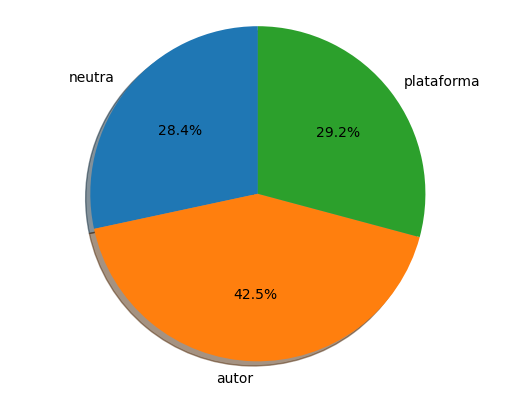

In [113]:
a = train.value_counts("target treino")

labels = ['neutra','autor','plataforma']

sizes = [a[0],a[1],a[2]]

fig1, ax1 = plt.subplots()

ax1.pie(sizes,labels = labels,autopct = '%1.1f%%',shadow = True, startangle = 90)

ax1.axis('equal')

plt.show()

In [114]:
palavras_0_train = ''

for n in train_0["Mensagem"]:
    palavras_0_train += ' ' + n

lista_palavras_0_train = palavras_0_train.split()
serie_palavras_0_train = pd.Series(lista_palavras_0_train)
#Tabela absoluta
tabela_absoluta_train_0 = serie_palavras_0_train.value_counts()
#Tabela rlativa
tabela_relativa_train_0 = serie_palavras_0_train.value_counts(True)

In [115]:
palavras_1_train = ''

for n in train_1["Mensagem"]:
    palavras_1_train += ' ' + n

lista_palavras_1_train = palavras_1_train.split()
serie_palavras_1_train = pd.Series(lista_palavras_1_train)
#Tabela absoluta
tabela_absoluta_train_1 = serie_palavras_1_train.value_counts()
#Tabela rlativa
tabela_relativa_train_1 = serie_palavras_1_train.value_counts(True)

In [116]:
palavras_2_train = ''

for n in train_2["Mensagem"]:
    palavras_2_train += ' ' + n

lista_palavras_2_train = palavras_2_train.split()
serie_palavras_2_train = pd.Series(lista_palavras_2_train)
#Tabela absoluta
tabela_absoluta_train_2 = serie_palavras_2_train.value_counts()
#Tabela rlativa
tabela_relativa_train_2 = serie_palavras_2_train.value_counts(True)

In [117]:
#TOTAL
lista_total_train = lista_palavras_0_train + lista_palavras_1_train + lista_palavras_2_train

#SERIE TOTAL
serie_total_train = pd.Series(lista_total_train)
#Tabela asboluta
tabela_absoluta_train_total = serie_total_train.value_counts()
#Tabela relativa
tabela_relativa_train_total = serie_total_train.value_counts(True)

In [118]:
prob_palavras_0_train = len(serie_palavras_0_train)/len(serie_total_train)
prob_palavras_1_train = len(serie_palavras_1_train)/len(serie_total_train)
prob_palavras_2_train = len(serie_palavras_2_train)/len(serie_total_train)

print(prob_palavras_0_train)
print(prob_palavras_1_train)
print(prob_palavras_2_train)

0.23278440416561566
0.49681092573240604
0.27040467010197833


# Suavização de Laplace

In [119]:
def laplace(palavra,freq_abs,serie_total):
    if palavra not in freq_abs:
        frequencia_da_palavra_categoria=1/(sum(freq_abs)+len(serie_total))
    else:
        frequencia_da_palavra_categoria=freq_abs[palavra]
    Prob_palavra_dada_cat=(1+frequencia_da_palavra_categoria)/(sum(freq_abs)+len(serie_total))
    return Prob_palavra_dada_cat

In [120]:
def naives(titulos,prob_pp_neutras,prob_pp_altas,prob_pp_baixas):
    lista_classificadora=[]
    for noticia_titulo in titulos:
        palavras=noticia_titulo.split()

        prob_neutras_noticia=1
        prob_altas_noticia=1
        prob_baixas_noticia=1

        for palavra in palavras:
            prob_neutras_noticia=prob_neutras_noticia*laplace(palavra, tabela_absoluta_train_0, serie_total_train)
            prob_altas_noticia=prob_altas_noticia*laplace(palavra, tabela_absoluta_train_1, serie_total_train)
            prob_baixas_noticia=prob_baixas_noticia*laplace(palavra, tabela_absoluta_train_2, serie_total_train)
        
        prob_neutras_noticia=prob_neutras_noticia*prob_pp_neutras
        prob_altas_noticia=prob_altas_noticia*prob_pp_altas
        prob_baixas_noticia=prob_baixas_noticia*prob_pp_baixas

        if prob_neutras_noticia>prob_altas_noticia and prob_neutras_noticia>prob_baixas_noticia:
            lista_classificadora.append(0)
        elif prob_altas_noticia>prob_neutras_noticia and prob_altas_noticia>prob_baixas_noticia:
            lista_classificadora.append(1)
        elif prob_baixas_noticia>prob_altas_noticia and prob_baixas_noticia>prob_neutras_noticia:
            lista_classificadora.append(2)
    return lista_classificadora

In [121]:
tabela_classificadora=naives(test['Mensagem'],prob_palavras_0_train,prob_palavras_1_train,prob_palavras_2_train)
series_lista_classificadora=pd.Series(tabela_classificadora)
tabela_class_rel=series_lista_classificadora.value_counts(True)
tabela_class_abs=series_lista_classificadora.value_counts()

In [122]:
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();

In [123]:
pd.crosstab(test['target:'], series_lista_classificadora)

col_0,0,1,2
target:,,,
0,0,39,18
1,1,62,29
2,1,56,25


___
### Concluindo

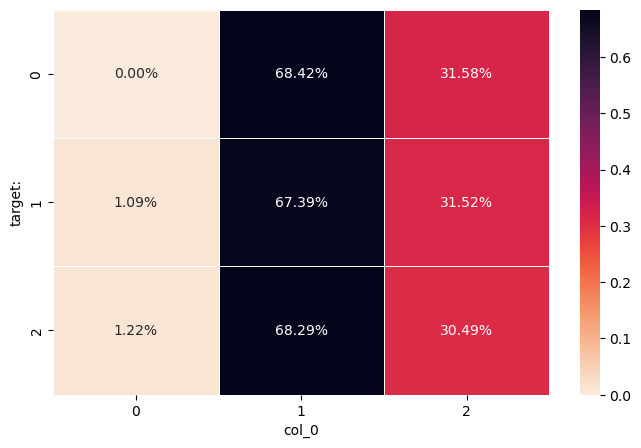

In [124]:
cross = pd.crosstab(index=test['target:'],
                    columns=series_lista_classificadora,
                    normalize='index')
plot_heatmap(cross, fmt='.2%')

In [ ]:
test_split = pd.read_excel(filename, sheet_name = 'Teste').rename(columns={'Teste':'Titulo'})
train_split = pd.read_excel(filename, sheet_name = 'Treinamento').rename(columns={'Treinamento':'Titulo'})

#Concatenando
total = pd.concat([train_split,test_split])

#Limpando os frases
total['Titulo'] = total['Titulo'].apply(cleanup)
total['Titulo'] = total['Titulo'].apply(stopwords)
total

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas categorias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por categoria (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**